In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [82]:
housing= pd.read_csv('cal_housing_clean.csv')

In [83]:
housing.head(3)

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
0,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0


In [84]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 7 columns):
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
dtypes: float64(7)
memory usage: 1.1 MB


In [85]:
housing.describe()

,housingMedianAge,totalRooms,totalBedrooms,population,households,medianIncome,medianHouseValue
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.898014,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.247906,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,295.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [86]:
housing.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome', 'medianHouseValue'],
      dtype='object')

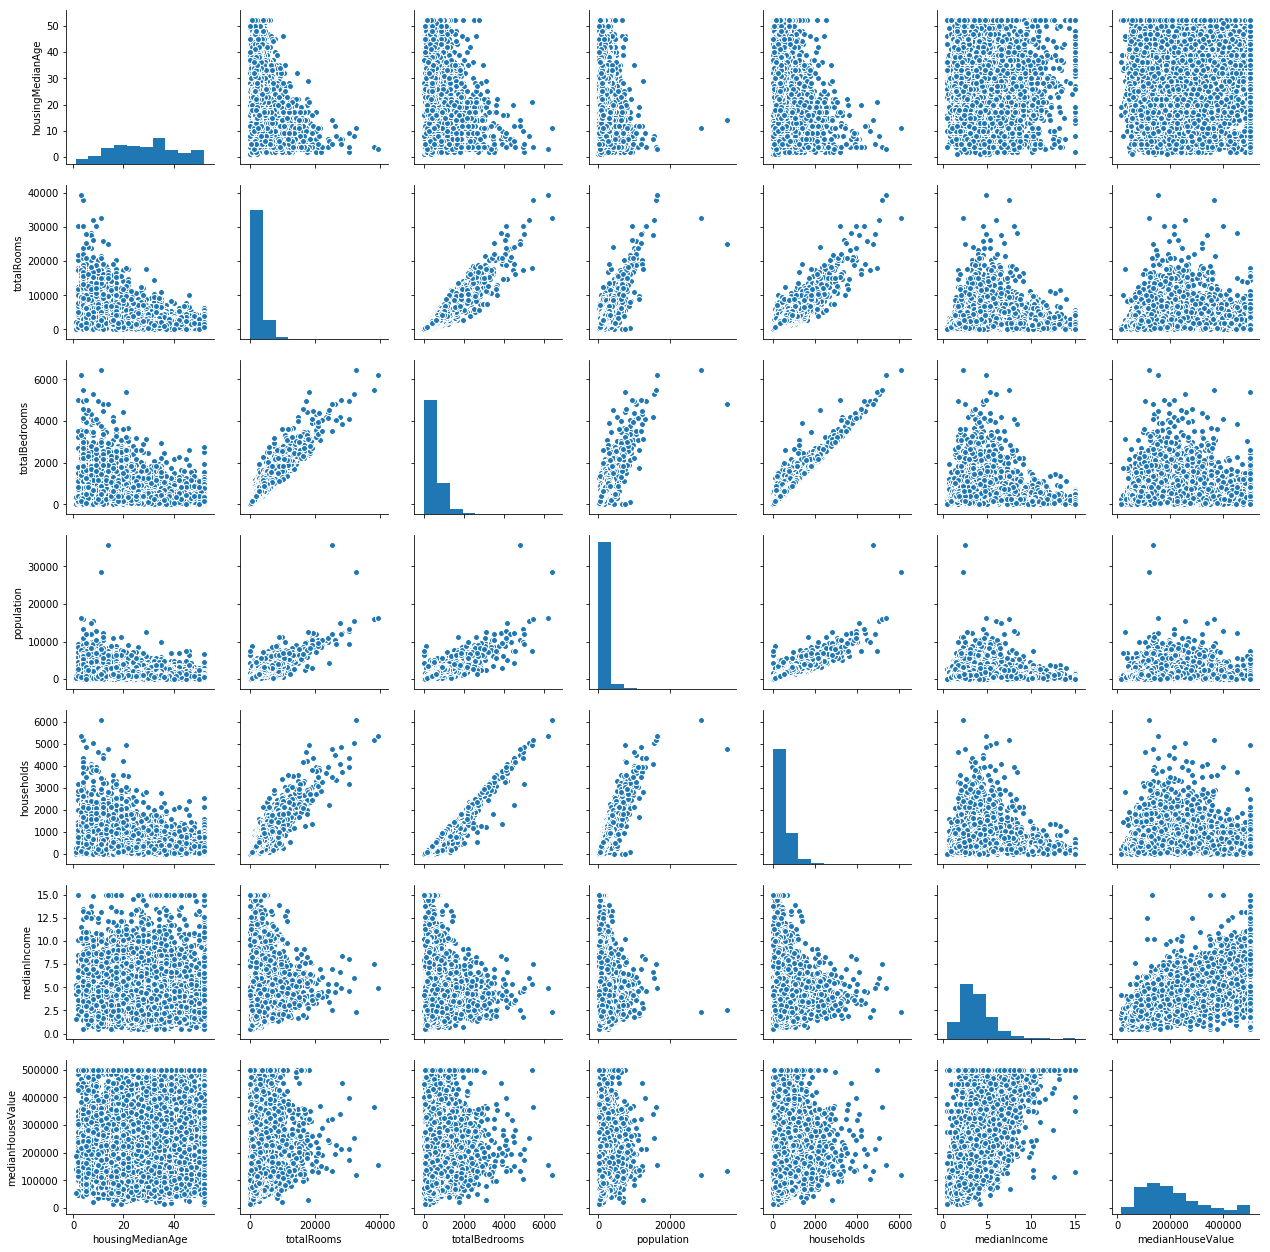

In [87]:
sns.pairplot(housing)

D:\Jupyter\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


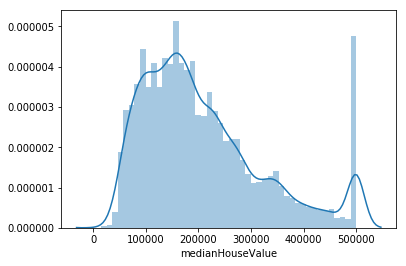

In [88]:
sns.distplot(housing['medianHouseValue'])

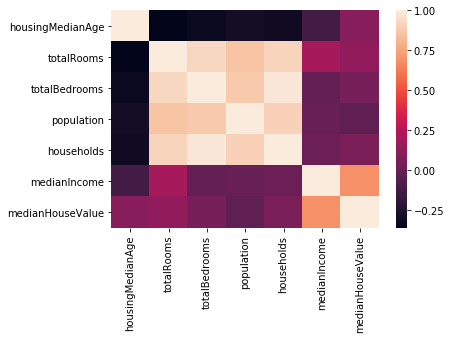

In [89]:
sns.heatmap(housing.corr())

In [90]:
y_val= housing['medianHouseValue']

In [91]:
X_data= housing.drop('medianHouseValue',axis=1)

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_val, test_size=0.3, random_state=101)

In [94]:
from sklearn.preprocessing import MinMaxScaler

In [95]:
scaler= MinMaxScaler()

In [96]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [97]:
X_train= pd.DataFrame(data=scaler.transform(X_train), index=X_train.index, columns=X_train.columns)

In [98]:
scaler.transform(X_train)

array([[-1.26874279e-02, -4.90948628e-05, -1.37001357e-04,
        -1.03323552e-04, -1.45462664e-04, -2.46473580e-02],
       [-7.68935025e-03, -5.05813706e-05, -1.52750854e-04,
        -1.04738036e-04, -1.62120965e-04, -3.13701214e-02],
       [-6.53594771e-03, -5.02255920e-05, -1.50318593e-04,
        -1.04296776e-04, -1.59470781e-04, -1.97951732e-02],
       ...,
       [-1.76855056e-02, -4.85877166e-05, -1.41745472e-04,
        -1.03345615e-04, -1.51195716e-04, -7.62047934e-03],
       [-6.15148020e-03, -5.03303850e-05, -1.50125938e-04,
        -1.04366642e-04, -1.58767671e-04, -2.12467384e-02],
       [-1.11495579e-02, -4.86957439e-05, -1.37747893e-04,
        -1.02752365e-04, -1.46868884e-04, -2.41451127e-02]])

In [99]:
X_test= pd.DataFrame(data=scaler.transform(X_test), index=X_test.index, columns=X_test.columns)

In [100]:
import tensorflow as tf

In [101]:
housing.columns

Index(['housingMedianAge', 'totalRooms', 'totalBedrooms', 'population',
       'households', 'medianIncome', 'medianHouseValue'],
      dtype='object')

In [102]:
age= tf.feature_column.numeric_column('housingMedianAge')
totalRooms=tf.feature_column.numeric_column('totalRooms')
totalBedrooms=tf.feature_column.numeric_column('totalBedrooms')
population=tf.feature_column.numeric_column('population')
households= tf.feature_column.numeric_column('households')
medianIncome=tf.feature_column.numeric_column('medianIncome')
#medianHouseValue=tf.feature_column.numeric_column('medianHouseValue')

In [103]:
feat_col=[age,totalRooms,totalBedrooms,population,households,medianIncome]

In [104]:
input_func=tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [105]:
model=tf.estimator.DNNRegressor(hidden_units=[10,10,10],feature_columns=feat_col)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\SIFATI~1\\AppData\\Local\\Temp\\tmp4htnf19z', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x00000250D702A828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [106]:
model.train(input_fn=input_func,steps=1500)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\SIFATI~1\AppData\Local\Temp\tmp4htnf19z\model.ckpt.
INFO:tensorflow:loss = 267523700000.0, step = 1
INFO:tensorflow:global_step/sec: 424.289
INFO:tensorflow:loss = 371258100000.0, step = 101 (0.236 sec)
INFO:tensorflow:global_step/sec: 510.021
INFO:tensorflow:loss = 457684550000.0, step = 201 (0.200 sec)
INFO:tensorflow:global_step/sec: 532.628
INFO:tensorflow:loss = 792750460000.0, step = 301 (0.188 sec)
INFO:tensorflow:global_step/sec: 580.451
INFO:tensorflow:loss = 757155200000.0, step = 401 (0.168 sec)
INFO:tensorflow:global_step/sec: 557.4
INFO:tensorflow:loss = 586068850000.0, step = 501 (0.179 sec)
INFO:tensorflow:global_step/sec: 717.065
INFO:tensorflow:loss = 134377710000.0, step = 601 (0.1

In [107]:
predict_input_func= tf.estimator.inputs.pandas_input_fn(x= X_test,batch_size=10, num_epochs=1, shuffle=False)

In [108]:
pred_gen= model.predict(predict_input_func)

In [109]:
predictions= list(pred_gen)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\SIFATI~1\AppData\Local\Temp\tmp4htnf19z\model.ckpt-1500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [110]:
final_preds= []

for i in predictions:
    final_preds.append(i['predictions'])

In [111]:
from sklearn.metrics import mean_squared_error

In [115]:
mean_squared_error(y_test,final_preds)**0.5

115848.44962097454